In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
covid_df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\data_global_data.csv")
covid_df.tail()

,country,date,deaths,daily_deaths
218281,Zimbabwe,01/08/23,5637,0.0
218282,Zimbabwe,01/09/23,5637,0.0
218283,Zimbabwe,01/10/23,5637,0.0
218284,Zimbabwe,01/11/23,5637,0.0
218285,Zimbabwe,01/12/23,5637,0.0


In [3]:
# Convert date column to datetime especificando o formato
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%m/%d/%y')

# Check if there are missing values
print("\nMissing Values:")
print(covid_df.isnull().sum())

# Check if there are duplicate entries
print("\nNumber of Duplicate Entries:", covid_df.duplicated().sum())

# Check how many countries are in the dataset
print("\nNumber of Unique Countries:", covid_df['country'].nunique())


Missing Values:
country         0
date            0
deaths          0
daily_deaths    0
dtype: int64

Number of Duplicate Entries: 0

Number of Unique Countries: 201


In [4]:
covid_df.loc[covid_df['country'] == 'Brazil'] ## Check the indices for which we have Brazil entries

,country,date,deaths,daily_deaths
26064,Brazil,2020-01-23,0,0.0
26065,Brazil,2020-01-24,0,0.0
26066,Brazil,2020-01-25,0,0.0
26067,Brazil,2020-01-26,0,0.0
26068,Brazil,2020-01-27,0,0.0
...,...,...,...,...
27145,Brazil,2023-01-08,694779,0.0
27146,Brazil,2023-01-09,694779,0.0
27147,Brazil,2023-01-10,694985,206.0
27148,Brazil,2023-01-11,695088,103.0


In [5]:
covid_df.loc[26064:27149]

,country,date,deaths,daily_deaths
26064,Brazil,2020-01-23,0,0.0
26065,Brazil,2020-01-24,0,0.0
26066,Brazil,2020-01-25,0,0.0
26067,Brazil,2020-01-26,0,0.0
26068,Brazil,2020-01-27,0,0.0
...,...,...,...,...
27145,Brazil,2023-01-08,694779,0.0
27146,Brazil,2023-01-09,694779,0.0
27147,Brazil,2023-01-10,694985,206.0
27148,Brazil,2023-01-11,695088,103.0


In [6]:
## Define the number of deaths that will be used to define the pre-intervention period
pre_intervention_death_count = 80 

## Create a column to identify the post-intervention period
covid_df['post-intervention'] = covid_df['deaths'] >= pre_intervention_death_count 

covid_df.head()

,country,date,deaths,daily_deaths,post-intervention
0,Afghanistan,2020-01-23,0,0.0,False
1,Afghanistan,2020-01-24,0,0.0,False
2,Afghanistan,2020-01-25,0,0.0,False
3,Afghanistan,2020-01-26,0,0.0,False
4,Afghanistan,2020-01-27,0,0.0,False


In [7]:
# Get post-intervention date for each country
t0_date = covid_df[covid_df['post-intervention']].groupby('country')['date'].min()
t0_date

country
Afghanistan          2020-05-06
Albania              2020-07-07
Algeria              2020-04-02
Andorra              2020-12-18
Angola               2020-08-11
                        ...    
Vietnam              2021-06-29
West Bank and Gaza   2020-07-29
Yemen                2020-05-31
Zambia               2020-07-17
Zimbabwe             2020-08-03
Name: date, Length: 179, dtype: datetime64[ns]

In [8]:
# Create a column with the t0 date for each country
covid_df = pd.merge(covid_df, t0_date.reset_index(), on='country', how='left')\
                .rename(columns={'date_x': 'date', 'date_y': 't0_date'})

# Extract the difference between the date of the current observation and the t = 0 date
covid_df['t'] = (covid_df['date'] - covid_df['t0_date']).dt.days

In [9]:
# Filter the dates on where t is between -20 and 20
covid_df = covid_df[(covid_df['t'] >= -20) & (covid_df['t'] <= 20)]

covid_df.head()

,country,date,deaths,daily_deaths,post-intervention,t0_date,t
84,Afghanistan,2020-04-16,29,4.0,False,2020-05-06,-20.0
85,Afghanistan,2020-04-17,30,1.0,False,2020-05-06,-19.0
86,Afghanistan,2020-04-18,30,0.0,False,2020-05-06,-18.0
87,Afghanistan,2020-04-19,30,0.0,False,2020-05-06,-17.0
88,Afghanistan,2020-04-20,33,3.0,False,2020-05-06,-16.0


In [12]:
mobility_df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\data_global_mobility_report.csv").rename(columns={'country_region': 'country'})

In [13]:
mobility_df[mobility_df['country'] == 'Brazil'] ## Find the indices for Brazil

,country_region_code,country,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
17436,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
17437,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
17438,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
17439,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
17440,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18405,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2022-10-11,16.0,62.0,16.0,11.0,33.0,0.0
18406,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2022-10-12,0.0,33.0,64.0,-35.0,-52.0,14.0
18407,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2022-10-13,4.0,55.0,24.0,8.0,34.0,1.0
18408,BR,Brazil,NaN,NaN,NaN,NaN,NaN,ChIJzyjM68dZnAARYz4p8gYVWik,2022-10-14,6.0,56.0,17.0,8.0,35.0,2.0


In [14]:
# restrict only to country wide data
mobility_df = mobility_df[mobility_df['sub_region_1'].isnull() & \
                          mobility_df['sub_region_2'].isnull() & \
                          mobility_df['metro_area'].isnull()]

mobility_df['date'] = pd.to_datetime(mobility_df['date']) ## Convert the dates into datetime objects
mobility_df[mobility_df['country'] == 'Brazil'][['country', 'date', 'retail_and_recreation_percent_change_from_baseline']] ## looking at retail and recreation percent change for Brazil

,country,date,retail_and_recreation_percent_change_from_baseline
17436,Brazil,2020-02-15,5.0
17437,Brazil,2020-02-16,2.0
17438,Brazil,2020-02-17,-2.0
17439,Brazil,2020-02-18,-3.0
17440,Brazil,2020-02-19,-1.0
...,...,...,...
18405,Brazil,2022-10-11,16.0
18406,Brazil,2022-10-12,0.0
18407,Brazil,2022-10-13,4.0
18408,Brazil,2022-10-14,6.0


In [15]:
# get mobility scores specifically on the dates that are reported in the covid_df when t is between -20 and -1
mobility_df = pd.merge(mobility_df, covid_df[covid_df['t'] < 0], on=['country', 'date'], how='right')

# now the retail scores are only on the dates we care about for each country
mobility_df[['country', 'date', 't', 'retail_and_recreation_percent_change_from_baseline']].head()

,country,date,t,retail_and_recreation_percent_change_from_baseline
0,Afghanistan,2020-04-16,-20.0,-46.0
1,Afghanistan,2020-04-17,-19.0,-41.0
2,Afghanistan,2020-04-18,-18.0,-43.0
3,Afghanistan,2020-04-19,-17.0,-43.0
4,Afghanistan,2020-04-20,-16.0,-42.0


In [16]:
# now we group countries based on their scores
country_mobility_scores = \
        mobility_df.groupby('country')['retail_and_recreation_percent_change_from_baseline'].mean()

low_countries = []
moderate_countries = []
severe_countries = []

for country, score in country_mobility_scores.items():
    if(not pd.isnull(score)):
        if(score > -10):
            low_countries.append(country)
        elif(score < -40):
            severe_countries.append(country)
        else:
            moderate_countries.append(country)

In [17]:
# Check the number of countries in each group
len(low_countries), len(moderate_countries), len(severe_countries)

(22, 50, 50)

In [18]:
# Checking Brazil's mobility score
brazil_score = country_mobility_scores.get('Brazil', None)
brazil_score

-26.9

In [19]:
# Creating dataframes for each mobility intervention category
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\data_global_data.csv")
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
low_df = df[df['country'].isin(low_countries)]
moderate_df = df[df['country'].isin(moderate_countries)]
severe_df = df[df['country'].isin(severe_countries)]  

In [20]:
low_df[['deaths', 'daily_deaths']].describe()

,deaths,daily_deaths
count,23892.000000,23892.000000
mean,20888.985937,33.704085
std,46672.570734,116.056283
min,0.000000,0.000000
25%,52.000000,0.000000
50%,651.000000,0.000000
75%,7651.000000,6.000000
max,215636.000000,2291.000000


In [21]:
moderate_df[['deaths', 'daily_deaths']].describe()

,deaths,daily_deaths
count,54300.00000,54300.000000
mean,24462.70744,41.239484
std,83828.86868,176.434800
min,0.00000,0.000000
25%,162.00000,0.000000
50%,1584.00000,1.000000
75%,8942.00000,9.000000
max,695236.00000,4272.000000


In [22]:
severe_df[['deaths', 'daily_deaths']].describe()

,deaths,daily_deaths
count,54300.000000,54300.000000
mean,25131.893941,41.114715
std,60567.585969,169.729104
min,0.000000,0.000000
25%,1230.000000,0.000000
50%,6937.000000,5.000000
75%,21448.750000,27.000000
max,530725.000000,11447.000000


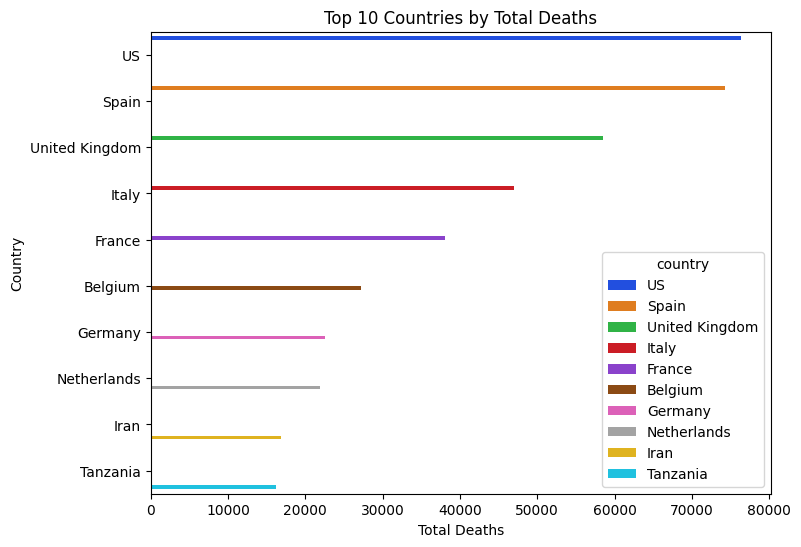

In [23]:
# Total deaths by country
country_deaths = covid_df.groupby('country')['deaths'].sum().reset_index()
country_deaths = country_deaths.sort_values(by='deaths', ascending=False)

# Plot com nova paleta
plt.figure(figsize=(8, 6))
sns.barplot(data=country_deaths.head(10), x='deaths', hue='country', y='country',
           palette='bright')  
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Total Deaths') 
plt.ylabel('Country')
plt.show()
plt.show()

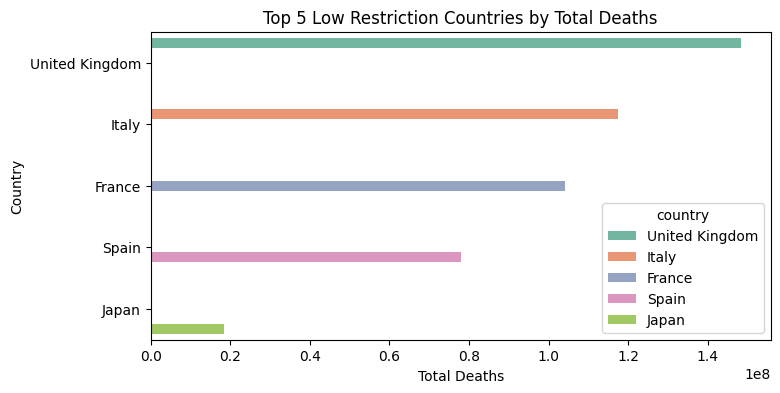

In [24]:
# Total deaths by low restriction countries
low_deaths = low_df.groupby('country')['deaths'].sum().reset_index()
low_deaths = low_deaths.sort_values(by='deaths', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(data=low_deaths.head(5), x='deaths', hue='country', y='country',
           palette='Set2') 
plt.title('Top 5 Low Restriction Countries by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

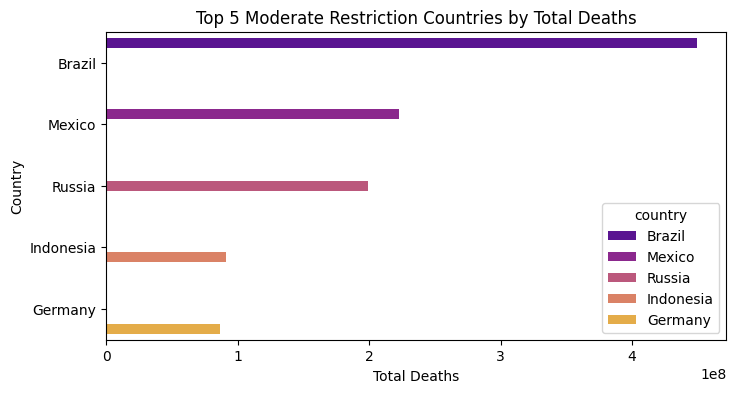

In [25]:
# Total deaths by moderate restriction countries
moderate_deaths = moderate_df.groupby('country')['deaths'].sum().reset_index()
moderate_deaths = moderate_deaths.sort_values(by='deaths', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(data=moderate_deaths.head(5), x='deaths', hue='country', y='country',
           palette='plasma') 
plt.title('Top 5 Moderate Restriction Countries by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

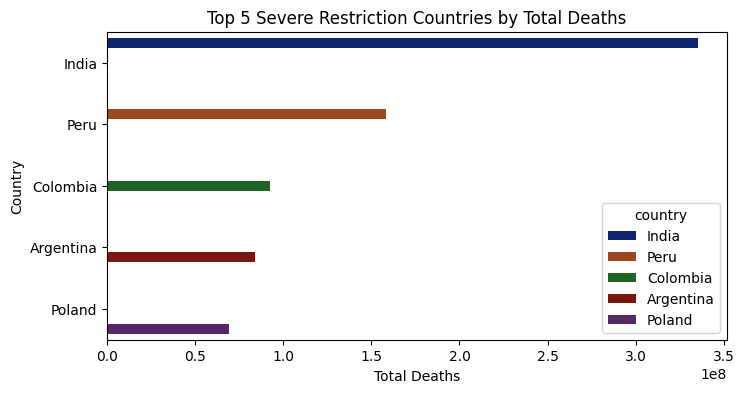

In [26]:
# Total deaths by severe restriction countries
severe_deaths = severe_df.groupby('country')['deaths'].sum().reset_index()
severe_deaths = severe_deaths.sort_values(by='deaths', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(data=severe_deaths.head(5), x='deaths', hue='country', y='country',
           palette='dark') 
plt.title('Top 5 Severe Restriction Countries by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

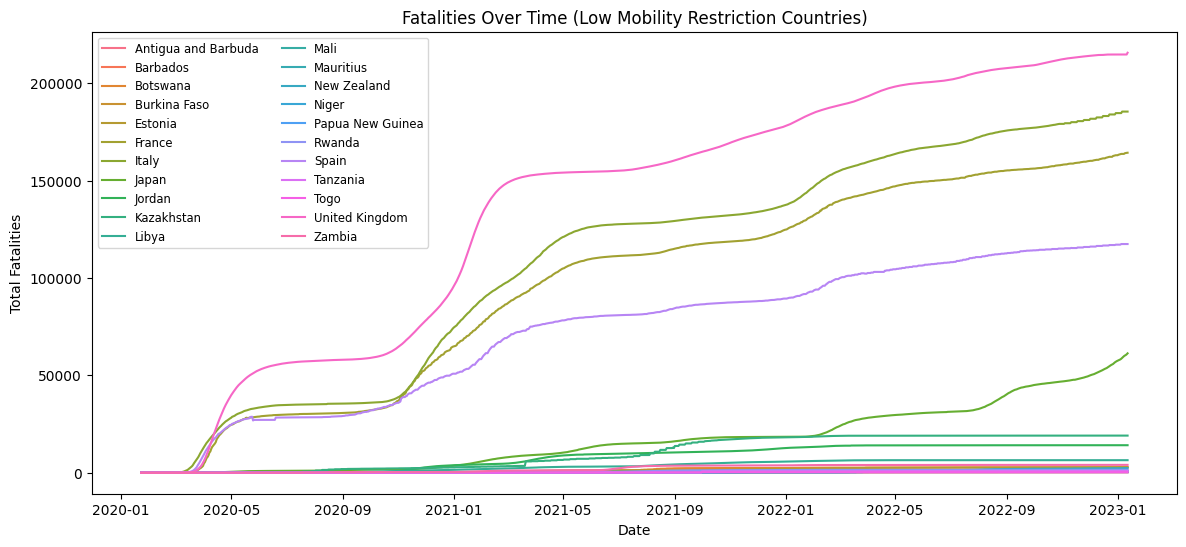

In [27]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(14, 6))
sns.lineplot(data=low_df, x='date', y='deaths', hue='country')
plt.title('Fatalities Over Time (Low Mobility Restriction Countries)')
plt.xlabel('Date')
plt.ylabel('Total Fatalities')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.show()

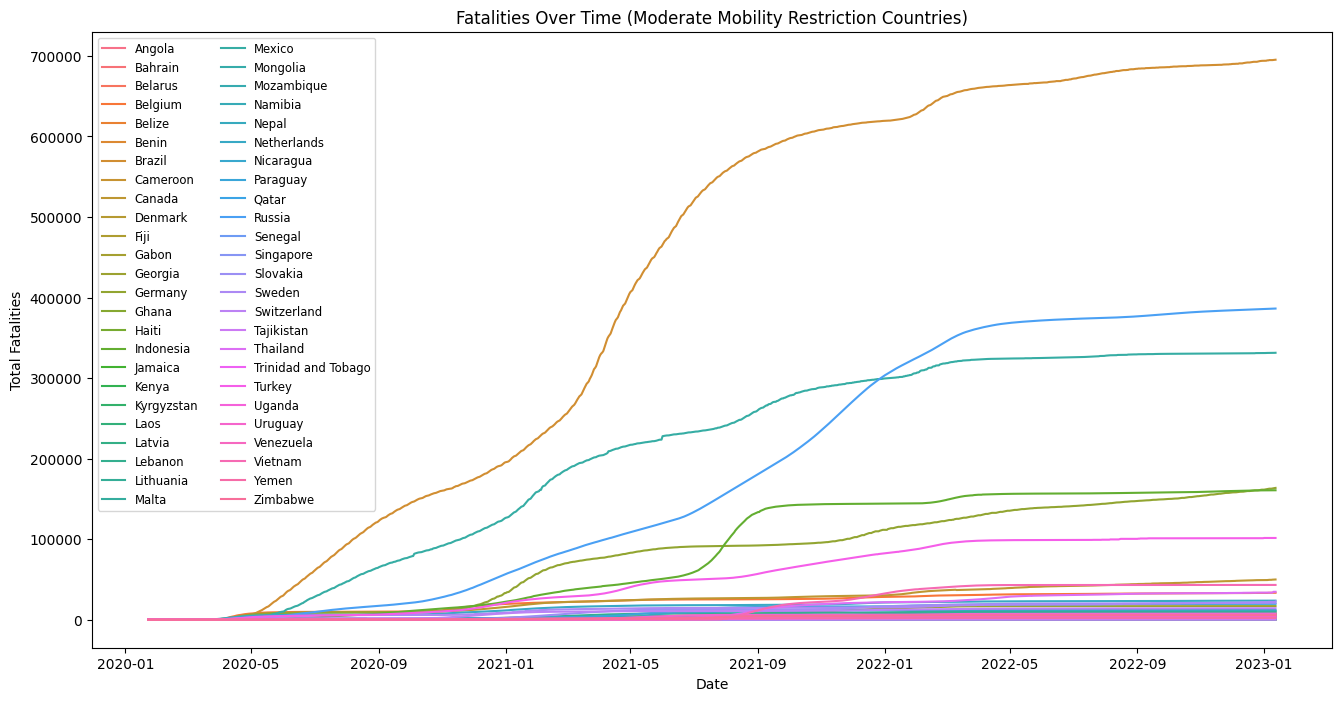

In [28]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 8))
sns.lineplot(data=moderate_df, x='date', y='deaths', hue='country')
plt.title('Fatalities Over Time (Moderate Mobility Restriction Countries)')
plt.xlabel('Date')
plt.ylabel('Total Fatalities')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.show()

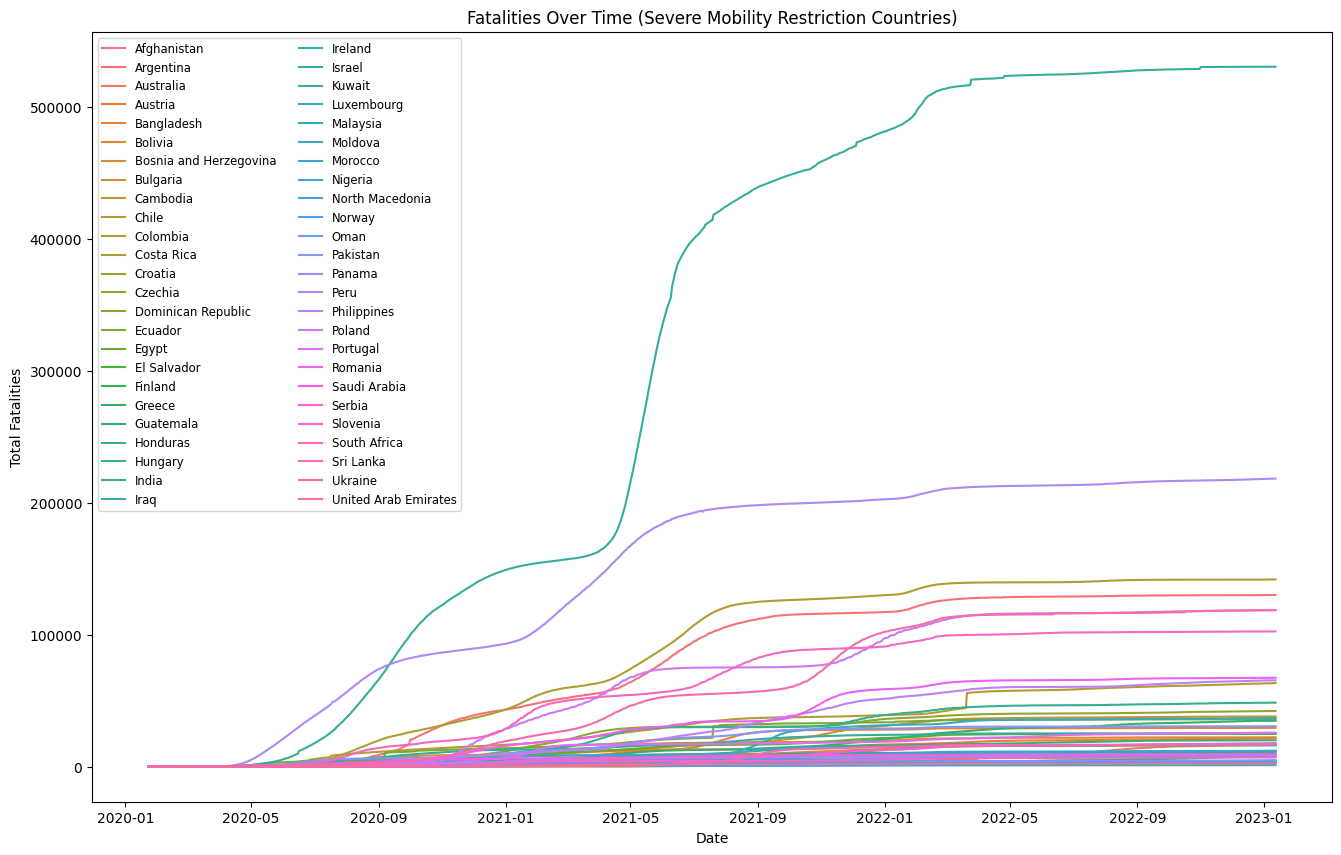

In [29]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 10))
sns.lineplot(data=severe_df, x='date', y='deaths', hue='country')
plt.title('Fatalities Over Time (Severe Mobility Restriction Countries)')
plt.xlabel('Date')
plt.ylabel('Total Fatalities')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.show()

In [30]:
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%m/%d/%y') ## Converting the dates into a datetime object in Pandas

In [31]:
covid_df.head()

,country,date,deaths,daily_deaths,post-intervention,t0_date,t
84,Afghanistan,2020-04-16,29,4.0,False,2020-05-06,-20.0
85,Afghanistan,2020-04-17,30,1.0,False,2020-05-06,-19.0
86,Afghanistan,2020-04-18,30,0.0,False,2020-05-06,-18.0
87,Afghanistan,2020-04-19,30,0.0,False,2020-05-06,-17.0
88,Afghanistan,2020-04-20,33,3.0,False,2020-05-06,-16.0


In [32]:
covid_df = covid_df[['country', 'daily_deaths', 't']]\
        .pivot(index='country', columns='t', values='daily_deaths').reset_index()

covid_df.head()

t,country,-20.0,-19.0,-18.0,-17.0,-16.0,-15.0,-14.0,-13.0,-12.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
0,Afghanistan,4.0,1.0,0.0,0.0,3.0,3.0,0.0,4.0,0.0,...,1.0,4.0,4.0,10.0,6.0,12.0,10.0,7.0,1.0,1.0
1,Albania,1.0,1.0,3.0,1.0,1.0,0.0,1.0,2.0,2.0,...,4.0,1.0,1.0,4.0,3.0,3.0,5.0,6.0,4.0,6.0
2,Algeria,1.0,1.0,1.0,0.0,0.0,3.0,2.0,2.0,4.0,...,20.0,13.0,10.0,12.0,16.0,3.0,8.0,9.0,8.0,10.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,3.0,0.0,2.0,4.0,1.0,1.0,6.0,1.0,3.0,...,0.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0


In [33]:
country_of_interest = "Brazil"
print(country_of_interest in moderate_countries) # confirm that the Brazil had moderate intervention

True


In [34]:
covid_df

t,country,-20.0,-19.0,-18.0,-17.0,-16.0,-15.0,-14.0,-13.0,-12.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
0,Afghanistan,4.0,1.0,0.0,0.0,3.0,3.0,0.0,4.0,0.0,...,1.0,4.0,4.0,10.0,6.0,12.0,10.0,7.0,1.0,1.0
1,Albania,1.0,1.0,3.0,1.0,1.0,0.0,1.0,2.0,2.0,...,4.0,1.0,1.0,4.0,3.0,3.0,5.0,6.0,4.0,6.0
2,Algeria,1.0,1.0,1.0,0.0,0.0,3.0,2.0,2.0,4.0,...,20.0,13.0,10.0,12.0,16.0,3.0,8.0,9.0,8.0,10.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,3.0,0.0,2.0,4.0,1.0,1.0,6.0,1.0,3.0,...,0.0,2.0,4.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Vietnam,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,...,2.0,7.0,6.0,7.0,6.0,69.0,18.0,0.0,29.0,80.0
175,West Bank and Gaza,4.0,3.0,6.0,3.0,3.0,5.0,0.0,7.0,2.0,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,2.0,3.0,0.0
176,Yemen,1.0,1.0,2.0,0.0,3.0,3.0,2.0,0.0,8.0,...,7.0,3.0,21.0,4.0,44.0,6.0,30.0,4.0,3.0,3.0
177,Zambia,0.0,1.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,...,2.0,4.0,3.0,2.0,14.0,5.0,1.0,2.0,3.0,23.0


In [35]:
severe_countries_ts = covid_df[covid_df['country'].isin(severe_countries)]
severe_countries_ts.head()

t,country,-20.0,-19.0,-18.0,-17.0,-16.0,-15.0,-14.0,-13.0,-12.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
0,Afghanistan,4.0,1.0,0.0,0.0,3.0,3.0,0.0,4.0,0.0,...,1.0,4.0,4.0,10.0,6.0,12.0,10.0,7.0,1.0,1.0
6,Argentina,1.0,0.0,0.0,2.0,2.0,1.0,4.0,5.0,1.0,...,11.0,5.0,13.0,11.0,9.0,7.0,5.0,10.0,7.0,4.0
8,Australia,5.0,5.0,5.0,5.0,1.0,3.0,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,Austria,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,31.0,29.0,17.0,22.0,23.0,17.0,12.0,21.0,13.0,16.0
13,Bangladesh,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,...,8.0,5.0,2.0,5.0,2.0,5.0,1.0,3.0,13.0,7.0


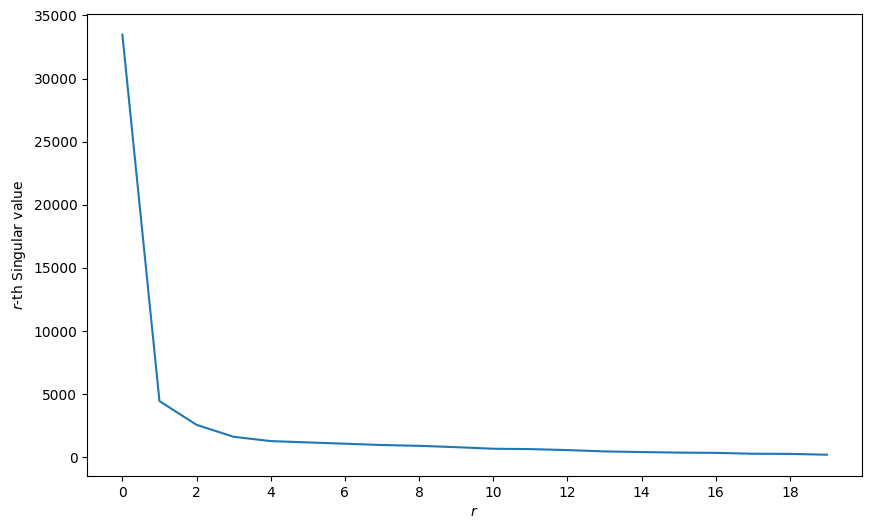

In [36]:
u, s, vh = np.linalg.svd(covid_df.dropna().loc[:, -20:-1].to_numpy())
plt.figure(figsize=(10, 6))
plt.plot(np.power(s, 2))
#plt.semilogy()
plt.xlabel("$r$")
plt.ylabel("$r$-th Singular value")
plt.xticks(np.arange(0, 20, 2))
plt.show()

In [37]:
Y_pre = severe_countries_ts.loc[:, -20:-1].to_numpy() ## isolating the pre-intervention period

# Applying SVD to denoise the data
u, s, vh = np.linalg.svd(Y_pre)

r_tilde=4
smat = np.zeros((u.shape[0], vh.shape[0])) 
smat[:r_tilde, :r_tilde] = np.diag(s[:r_tilde]) ## creating truncated singular values matrix keeping only the values that preserve 90% of energy

Y_pre_tilde = u @ smat @ vh ## reconstructing the denoised matrix

In [39]:
!pip install statsmodels

   ---------------------------------------- 9.1/9.1 MB 16.6 MB/s eta 0:00:00
   --------------------------------------- 232.9/232.9 kB 13.9 MB/s eta 0:00:00


In [40]:
import statsmodels.api as sm

# The dependent variable here is the pre-intervention time series observations from Brazil
brazil_pre = covid_df[covid_df['country'] == "Brazil"].loc[:, -20: -1].to_numpy().flatten()
dvs = brazil_pre
# We build the model with independent variables from the pre-intervention entries of the denoised matrix
ivs = Y_pre_tilde.T
model = sm.OLS(dvs, ivs)
reg = model.fit()

In [41]:
Y_post = severe_countries_ts.loc[:, 0:20].to_numpy() ## isolating the post-intervention period
severe_counterfactual_estimates = reg.predict(Y_post.T) ## estimating the severecounterfactual

# get true values for comparison
brazil_post = covid_df[covid_df['country'] == "Brazil"].loc[:, 0: 20].to_numpy().flatten()

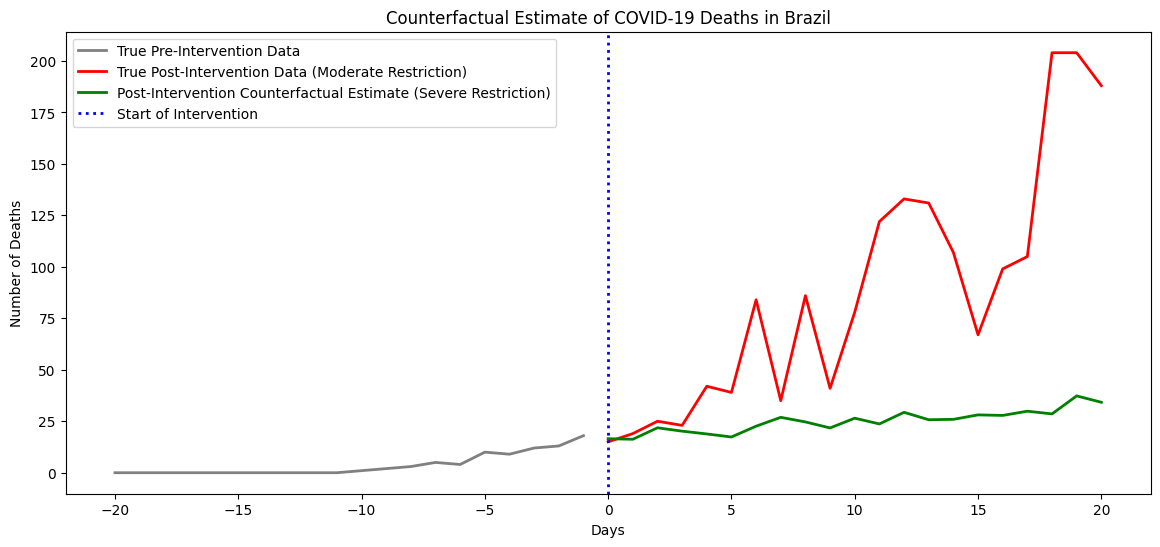

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(range(-20, 0), brazil_pre, 
         label="True Pre-Intervention Data", color='grey', linestyle='-', linewidth=2)

plt.plot(range(0, 21), brazil_post, 
         label="True Post-Intervention Data (Moderate Restriction)", color='red', linestyle='-', linewidth=2)

plt.plot(range(0, 21), severe_counterfactual_estimates, 
         label="Post-Intervention Counterfactual Estimate (Severe Restriction)", color='green', linestyle='-', linewidth=2)

plt.axvline(x=0, color='blue', linestyle=':', linewidth=2, label='Start of Intervention')

plt.xlabel('Days')
plt.ylabel('Number of Deaths')
plt.title('Counterfactual Estimate of COVID-19 Deaths in Brazil')
plt.legend()
plt.show()